In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("trending_videos.csv")

In [3]:
df.describe()

,user_id,video_id,video_time,video_length,n_likes,n_shares,n_comments,n_plays
count,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,6.339416e+18,6.988683e+18,1.627180e+09,15.400000,2.627353e+06,1.090323e+05,4.786165e+04,2.338491e+07
std,1.697732e+18,9.770098e+15,2.274777e+06,13.318173,4.151951e+06,2.425277e+05,1.559688e+05,3.761375e+07
min,1.195685e+07,6.967089e+18,1.622152e+09,7.000000,3.438000e+03,2.490000e+02,0.000000e+00,2.913000e+05
25%,6.721275e+18,6.981136e+18,1.625422e+09,9.000000,2.799750e+05,1.155000e+04,3.610250e+03,3.375000e+06
50%,6.786934e+18,6.992289e+18,1.628019e+09,11.000000,9.478000e+05,4.195000e+04,1.045000e+04,1.040000e+07
75%,6.879898e+18,6.997130e+18,1.629146e+09,15.000000,3.300000e+06,1.096750e+05,3.112500e+04,2.700000e+07
max,6.995923e+18,7.000078e+18,1.629833e+09,83.000000,2.800000e+07,2.100000e+06,1.500000e+06,2.223000e+08


In [4]:
df.head()

,user_name,user_id,video_id,video_desc,video_time,video_length,video_link,n_likes,n_shares,n_comments,n_plays
0,bts_official_bighit,6737188750352401410,6999919482068077826,✌️💜😚 #쮀이호오오옵 과 함께 신나게 #PTD,1629795759,18,https://www.tiktok.com/@bts_official_bighit/vi...,3600000,109500,212900,9700000
1,dulssy,6527426242138870784,6989072033573391621,😂😂😂😂,1627270146,9,https://www.tiktok.com/@dulssy/video/698907203...,2500000,233300,31100,34800000
2,coco224466,6974782710108521477,6977625126338710789,He really did the 🦗🦟#happydog #puppy #dog #fun...,1624604959,10,https://www.tiktok.com/@coco224466/video/69776...,4000000,306500,122500,45100000
3,moontellthat,6807620910251115525,6978279631048772869,I do need help 😩 #trolling #vietnamesegirl #c...,1624757343,27,https://www.tiktok.com/@moontellthat/video/697...,11300000,908100,125200,101200000
4,spicekingcam,6770811947673404422,6967513355456187654,shhh asmr #spiceking,1622250623,15,https://www.tiktok.com/@spicekingcam/video/696...,2700000,18300,59700,27900000


In [6]:
print(df.isnull().sum())

user_name        0
user_id          0
video_id         0
video_desc      13
video_time       0
video_length     0
video_link       0
n_likes          0
n_shares         0
n_comments       0
n_plays          0
dtype: int64


## Calculating Total and Average Engagement

In [4]:
total_engagement = {
    'total_likes' : df['n_likes'].sum(),
    'total_shares' : df['n_shares'].sum(),
    'total_plays' : df['n_plays'].sum(),
    'total_comments' : df['n_comments'].sum()
    
}

average_engagement = {
    'average_likes' : df['n_likes'].mean(),
    'average_shares' : df['n_shares'].mean(),
    'average_plays' : df['n_plays'].mean(),
    'average_comments' : df['n_comments'].mean()
}

## Visualizing Engagement Metrics

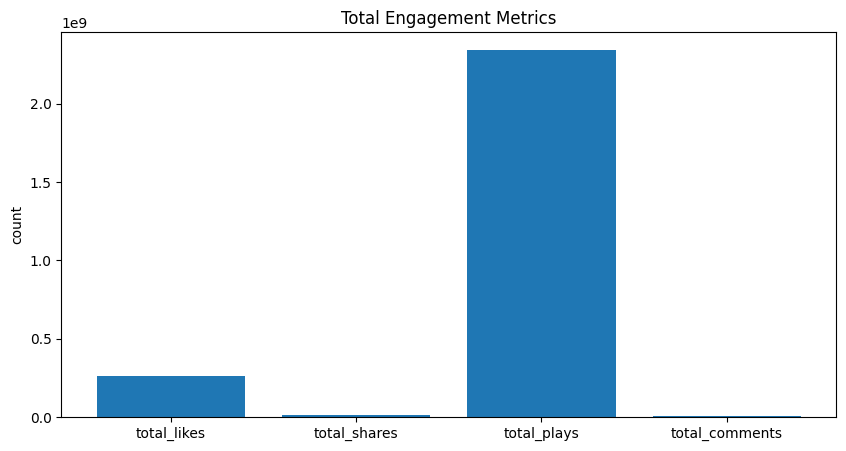

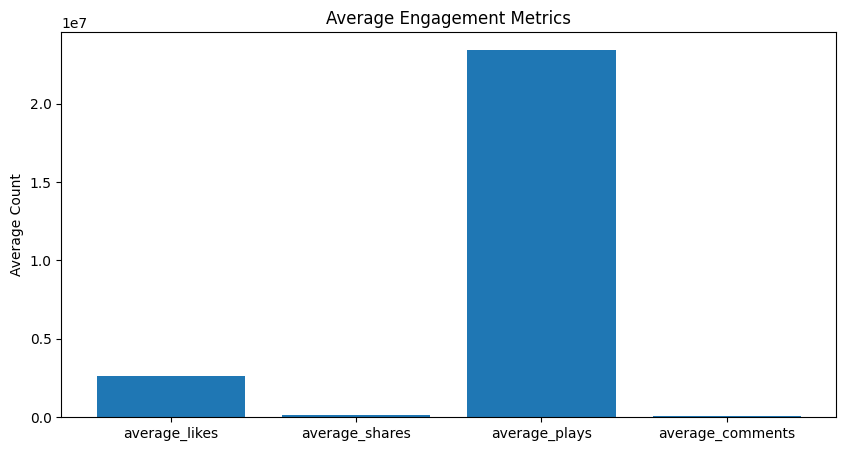

In [5]:
plt.figure(figsize=(10,5))
plt.bar(total_engagement.keys(),total_engagement.values())
plt.title("Total Engagement Metrics")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(average_engagement.keys(), average_engagement.values())
plt.title("Average Engagement Metrics")
plt.ylabel("Average Count")
plt.show()


## Analyzing Engagement by Video Length

In [6]:
bins = [0, 30, 60, 120, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['length_category'] = pd.cut(df['video_length'], bins=bins, labels=labels)

# Calculate average engagement by length category

length_engagement = df.groupby('length_category').agg({
    'n_likes': 'mean',
    'n_comments': 'mean',
    'n_shares': 'mean',
    'n_plays': 'mean'
}).reset_index()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11588\3917376952.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = df.groupby('length_category').agg({


In [7]:
print(length_engagement)

  length_category       n_likes   n_comments       n_shares       n_plays
0           Short  2.653976e+06  49738.51087  107317.934783  2.221947e+07
1          Medium  2.867567e+06  30437.00000  149496.833333  4.733333e+07
2            Long  6.820500e+05  13800.00000   66500.000000  5.150000e+06
3       Very Long           NaN          NaN            NaN           NaN


## Visualizing Engagement by Video Length

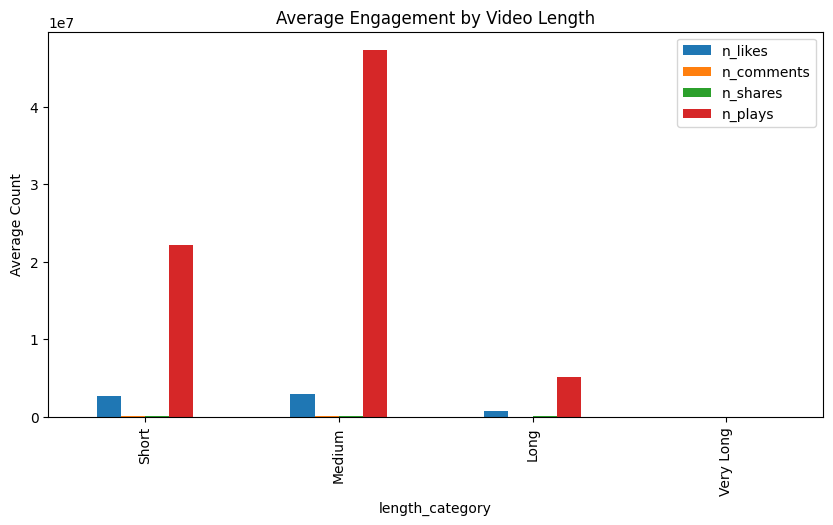

In [7]:
length_engagement.plot(x='length_category', kind='bar', figsize=(10, 5), title='Average Engagement by Video Length')
plt.ylabel('Average Count')
plt.show()

## Calculating the correlation between engagement metrics to identify relationships.

In [8]:
# Encode video length categories into numeric values
df['length_category_encoded'] = df['length_category'].map({'Short': 1, 'Medium': 2, 'Long': 3, 'Very Long': 4})
correlation_matrix = df[['length_category_encoded', 'n_likes', 'n_comments', 'n_shares', 'n_plays']].corr()


## Using a heatmap to visualize correlations between video lengths and other metrics

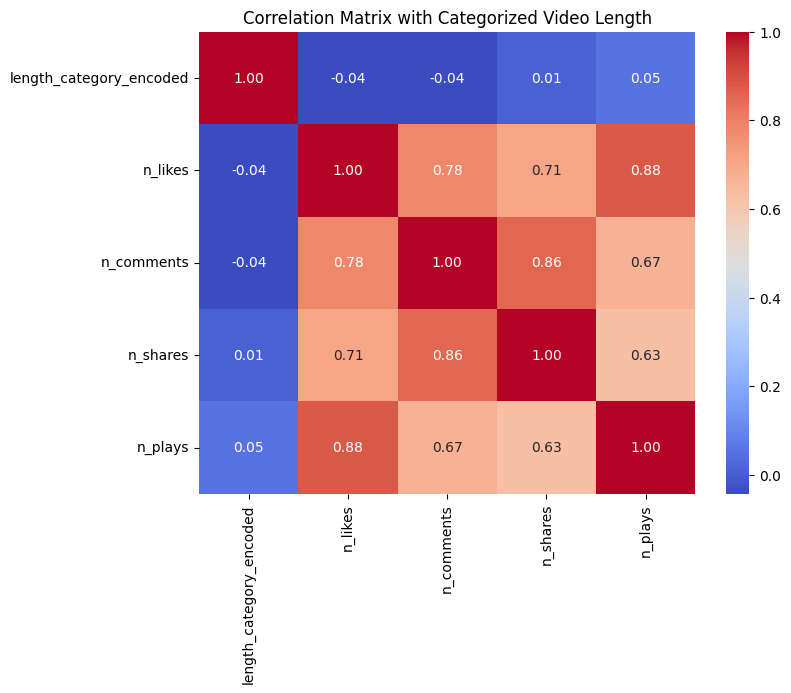

In [28]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Categorized Video Length')
plt.show()

In [9]:
print(correlation_matrix)

                         length_category_encoded   n_likes  n_comments  \
length_category_encoded                 1.000000 -0.042564   -0.043035   
n_likes                                -0.042564  1.000000    0.783226   
n_comments                             -0.043035  0.783226    1.000000   
n_shares                                0.008351  0.709019    0.857165   
n_plays                                 0.052432  0.879343    0.671663   

                         n_shares   n_plays  
length_category_encoded  0.008351  0.052432  
n_likes                  0.709019  0.879343  
n_comments               0.857165  0.671663  
n_shares                 1.000000  0.626206  
n_plays                  0.626206  1.000000  


## Converting Uinx time to datetime format

In [12]:
# Convert Unix timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['video_time'], unit='s')

#Extracting Features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month_name()

In [30]:
print(df)

              user_name              user_id             video_id  \
0   bts_official_bighit  6737188750352401410  6999919482068077826   
1                dulssy  6527426242138870784  6989072033573391621   
2            coco224466  6974782710108521477  6977625126338710789   
3          moontellthat  6807620910251115525  6978279631048772869   
4          spicekingcam  6770811947673404422  6967513355456187654   
..                  ...                  ...                  ...   
95              l_s_d_r  6768091588151739398  6990459477203963141   
96    campuzanoabelardo  6752168394252977158  6987921399197355270   
97          sexy_human_  6995922574211367938  6999390104183721218   
98       henriquezedwin  6584140933355372549  6994894437725916422   
99         kirito_jose1  6960452618931389445  6977566892558912774   

                                           video_desc  video_time  \
0                          ✌️💜😚 #쮀이호오오옵 과 함께 신나게 #PTD  1629795759   
1                                

##  Video Performance by Time of Day

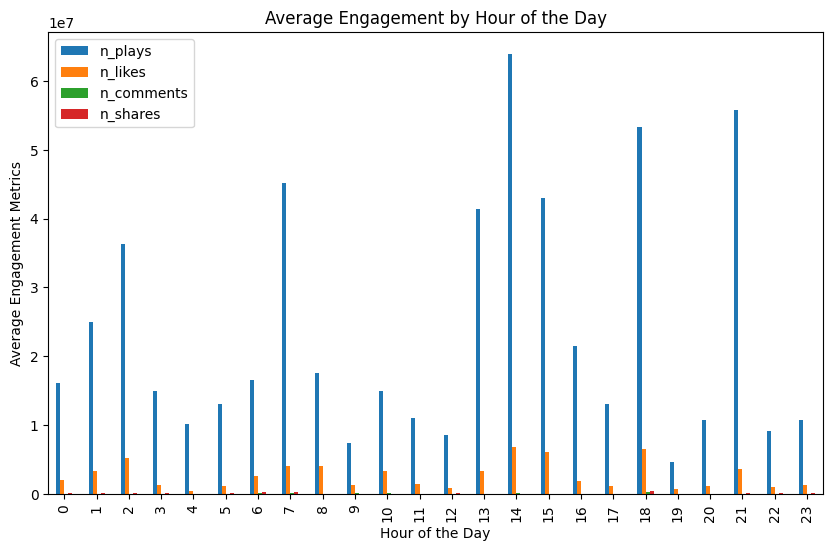

In [13]:
#Group by hour to analyze performance
hourly_engagement = df.groupby('hour').agg({
    'n_plays': 'mean',
    'n_likes': 'mean',
    'n_comments': 'mean',
    'n_shares': 'mean'
})

# Plot engagement metrics by hour of the day
hourly_engagement.plot(kind='bar', figsize=(10,6))
plt.title('Average Engagement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Metrics')
plt.show()

In [14]:
print(hourly_engagement)

           n_plays       n_likes     n_comments       n_shares
hour                                                          
0     1.616667e+07  1.974583e+06   21882.166667   92545.000000
1     2.503142e+07  3.303211e+06   32990.333333  133272.333333
2     3.623043e+07  5.233667e+06   39713.000000  113227.666667
3     1.496667e+07  1.306633e+06   14086.666667  103133.333333
4     1.020000e+07  4.497000e+05    8086.000000   54382.000000
5     1.310000e+07  1.200000e+06   27200.000000   91000.000000
6     1.660000e+07  2.653633e+06  119035.000000  228933.333333
7     4.510000e+07  4.000000e+06  122500.000000  306500.000000
8     1.756667e+07  4.066367e+06   66374.666667   43800.000000
9     7.333333e+06  1.370767e+06   73447.000000   56416.666667
10    1.500000e+07  3.351450e+06   87758.500000   35840.000000
11    1.100000e+07  1.458250e+06    7769.000000    2820.500000
12    8.633333e+06  8.552667e+05   19199.666667  131900.000000
13    4.145000e+07  3.273550e+06   23750.000000   52150

## Video Performance by Seasons(Months/Quarters)

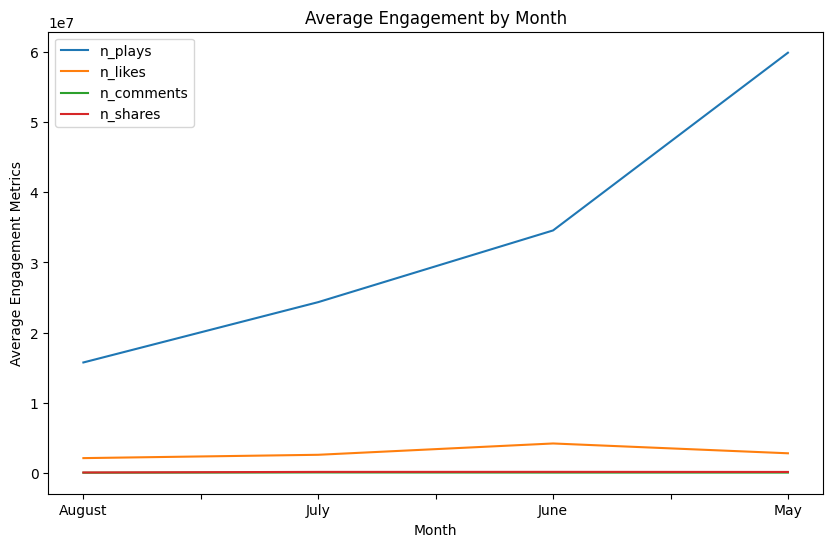

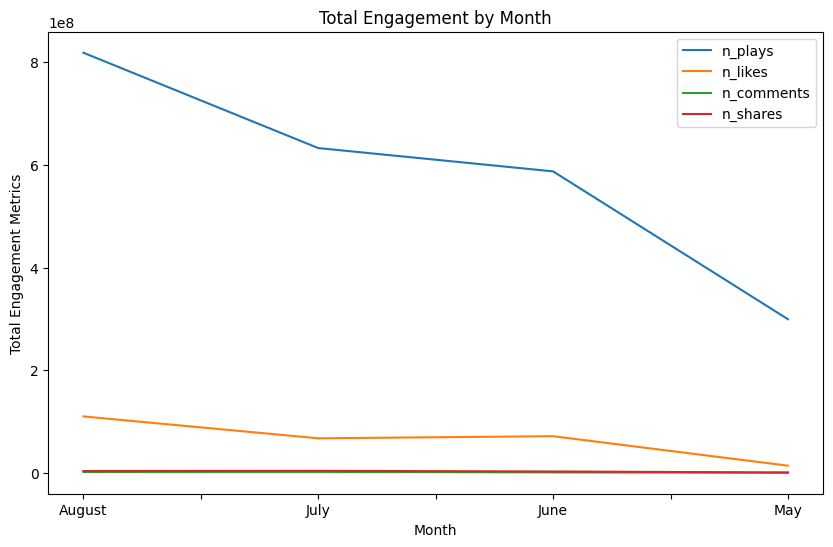

In [11]:
# Group by month to analyze seasonal trends
avg_monthly_engagement = df.groupby('month').agg({
    'n_plays': 'mean',
    'n_likes': 'mean',
    'n_comments': 'mean',
    'n_shares': 'mean'
})

total_monthly_engagement = df.groupby('month').agg({
    'n_plays': 'sum',
    'n_likes': 'sum',
    'n_comments': 'sum',
    'n_shares': 'sum'
})

# Plotting average engagement metrics by month
avg_monthly_engagement.plot(kind='line', figsize=(10,6))
plt.title('Average Engagement by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagement Metrics')
plt.show()

# Plotting total engagement metrics by month
total_monthly_engagement.plot(kind='line', figsize=(10,6))
plt.title('Total Engagement by Month')
plt.xlabel('Month')
plt.ylabel('Total Engagement Metrics')
plt.show()

In [39]:
monthly_plays = df.groupby('month')['n_plays'].mean().reindex(['May', 'June', 'July', 'August'])
print(monthly_plays)

month
May       5.988000e+07
June      3.455831e+07
July      2.434231e+07
August    1.574423e+07
Name: n_plays, dtype: float64


In [41]:
monthly_plays = df.groupby('month')['n_plays'].sum().reindex(['May', 'June', 'July', 'August'])
print(monthly_plays)

month
May       299400000
June      587491300
July      632900000
August    818699800
Name: n_plays, dtype: int64


In [43]:
n_videos = len(df)
print(n_videos)

100
